Importing Library

In [107]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.optimizers import Adam
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

Loading Dataset

In [108]:
# Load our dataset 
maindf=pd.read_csv('BTC-USD.csv')

In [109]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  527
Total number of fields present in the dataset:  7


**EDA**

In [110]:
maindf.shape

(527, 7)

In [111]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-09-2021,47099.77344,49111.08984,46562.43750,48847.02734,48847.02734,3.913940e+10
1,02-09-2021,48807.84766,50343.42188,48652.32031,49327.72266,49327.72266,3.950807e+10
2,03-09-2021,49288.25000,50982.27344,48386.08594,50025.37500,50025.37500,4.320618e+10
3,04-09-2021,50009.32422,50545.58203,49548.78125,49944.62500,49944.62500,3.747133e+10
4,05-09-2021,49937.85938,51868.67969,49538.59766,51753.41016,51753.41016,3.032268e+10


In [112]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
522,05-02-2023,23332.24805,23423.43555,22841.75977,22955.66602,22955.66602,1.956426e+10
523,06-02-2023,22954.02148,23119.27930,22692.02539,22760.10938,22760.10938,2.382501e+10
524,07-02-2023,22757.26758,23310.97461,22756.25781,23264.29102,23264.29102,2.718796e+10
525,08-02-2023,23263.41602,23367.95898,22731.09766,22939.39844,22939.39844,2.537137e+10
526,09-02-2023,22946.56641,22996.43750,21773.97461,21819.03906,21819.03906,3.257257e+10


In [113]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       527 non-null    object 
 1   Open       527 non-null    float64
 2   High       527 non-null    float64
 3   Low        527 non-null    float64
 4   Close      527 non-null    float64
 5   Adj Close  527 non-null    float64
 6   Volume     527 non-null    float64
dtypes: float64(6), object(1)
memory usage: 28.9+ KB


In [114]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,527.000000,527.000000,527.000000,527.000000,527.000000,5.270000e+02
mean,33541.861010,34234.651466,32737.857511,33485.647404,33485.647404,3.062897e+10
std,14430.867371,14779.381314,14024.751018,14416.493443,14416.493443,1.166798e+10
min,15782.300780,16253.047850,15599.046880,15787.284180,15787.284180,7.714767e+09
25%,20210.118165,20641.377930,19808.283205,20221.667970,20221.667970,2.368033e+10
50%,30110.330080,30664.976560,29375.689450,30101.265630,30101.265630,2.933388e+10
75%,44222.251955,45038.535160,43030.962890,44040.152345,44040.152345,3.588726e+10
max,67549.734380,68789.625000,66382.062500,67566.828130,67566.828130,1.190000e+11


In [115]:
sns.relplot(x="High", y="Close", data = maindf)

In [116]:
sns.relplot(x="Low", y="Close", data = maindf)

In [117]:
sns.catplot(x="High", y="Close", data = maindf,dodge=True)

In [118]:
sns.jointplot(x="High", y="Close", data = maindf)

In [119]:
sns.jointplot(x="Low", y="Close", data = maindf)

In [120]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%d-%m-%Y')
y_overall = maindf.loc[(maindf['Date'] >= '15-02-2022')
                     & (maindf['Date'] <= '15-02-2023')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:60: UserWarning:

Parsing '15-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:52: UserWarning:

Parsing '15-02-2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.



,Date,Open,High,Low,Close
167,2022-02-15,42586.46484,44667.21875,42491.03516,44575.20313
168,2022-02-16,44578.27734,44578.27734,43456.69141,43961.85938
169,2022-02-17,43937.07031,44132.97266,40249.37109,40538.01172
170,2022-02-18,40552.13281,40929.15234,39637.61719,40030.97656
171,2022-02-19,40026.02344,40418.87891,39713.05859,40122.15625
...,...,...,...,...,...
522,2023-02-05,23332.24805,23423.43555,22841.75977,22955.66602
523,2023-02-06,22954.02148,23119.27930,22692.02539,22760.10938
524,2023-02-07,22757.26758,23310.97461,22756.25781,23264.29102
525,2023-02-08,23263.41602,23367.95898,22731.09766,22939.39844


In [121]:
monthwise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthwise = monthwise.reindex(new_order, axis=0)
monthwise

,Open,Close
Date,,
January,20043.860132,20250.717490
February,33314.492952,33286.425019
March,41889.148438,41966.237526
April,41694.653646,41435.319662
May,31900.711128,31706.105218
June,24783.338477,24383.685483
July,21424.733053,21539.253843
August,22471.866558,22366.266318
September,19821.353711,19804.779231


In [122]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [123]:
# Lets First Take all the Close Price 
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (527, 2)


In [124]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2021-2023', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [125]:
closedf = closedf[closedf['Date'] > '15-02-2021'] 
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  527


c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:56: UserWarning:

Parsing '15-02-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.



In [126]:
closedf

,Date,Close
0,2021-09-01,48847.02734
1,2021-09-02,49327.72266
2,2021-09-03,50025.37500
3,2021-09-04,49944.62500
4,2021-09-05,51753.41016
...,...,...
522,2023-02-05,22955.66602
523,2023-02-06,22760.10938
524,2023-02-07,23264.29102
525,2023-02-08,22939.39844


In [127]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Price'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='blue')
fig.update_layout(title_text='Period considered to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [128]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(527, 1)


In [129]:
# we keep the training set as 80% and 20% testing set

training_size=int(len(closedf)*0.80)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (421, 1)
test_data:  (106, 1)


In [130]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [131]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (405, 15)
y_train:  (405,)
X_test:  (90, 15)
y_test (90,)


In [132]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (405, 15, 1)
X_test:  (90, 15, 1)


In [133]:
print(X_train.shape[1])
print(X_test.shape[2])

15
1


In [134]:
def create_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(units=64)))
    model.add(Dense(units=1))

    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    return model

In [135]:
model = create_model((None,1))

In [136]:
def train_model(model, X_train, y_train, X_test, y_test):
    early_stopping = EarlyStopping(patience=5, verbose=1, restore_best_weights=True)

    def lr_scheduler(epoch):
        if epoch < 10:
            return 0.001
        else:
            return 0.001 * np.exp(0.1 * (10 - epoch))

    lr_schedule = LearningRateScheduler(lr_scheduler)

    model.fit(X_train, y_train, batch_size=32, epochs=50,
              validation_data=(X_test, y_test), callbacks=[early_stopping, lr_schedule])
  
    return model

In [137]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, None, 256)        133120    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, None, 256)         0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 297,601
Trainable params: 297,601
Non-trainable params: 0
_________________________________________________________________


In [138]:
model.build()

In [139]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=32,verbose=1)

Epoch 1/20
13/13 [==============================] - 16s 354ms/step - loss: 0.0384 - val_loss: 9.3297e-04
Epoch 2/20
13/13 [==============================] - 1s 93ms/step - loss: 0.0075 - val_loss: 7.3860e-04
Epoch 3/20
13/13 [==============================] - 1s 75ms/step - loss: 0.0041 - val_loss: 0.0010
Epoch 4/20
13/13 [==============================] - 1s 59ms/step - loss: 0.0037 - val_loss: 0.0015
Epoch 5/20
13/13 [==============================] - 1s 48ms/step - loss: 0.0033 - val_loss: 9.2105e-04
Epoch 6/20
13/13 [==============================] - 1s 52ms/step - loss: 0.0033 - val_loss: 8.8975e-04
Epoch 7/20
13/13 [==============================] - 1s 54ms/step - loss: 0.0031 - val_loss: 9.4073e-04
Epoch 8/20
13/13 [==============================] - 1s 58ms/step - loss: 0.0030 - val_loss: 7.5101e-04
Epoch 9/20
13/13 [==============================] - 1s 49ms/step - loss: 0.0028 - val_loss: 7.9304e-04
Epoch 10/20
13/13 [==============================] - 1s 52ms/step - loss: 0.002

Training and Validation loss

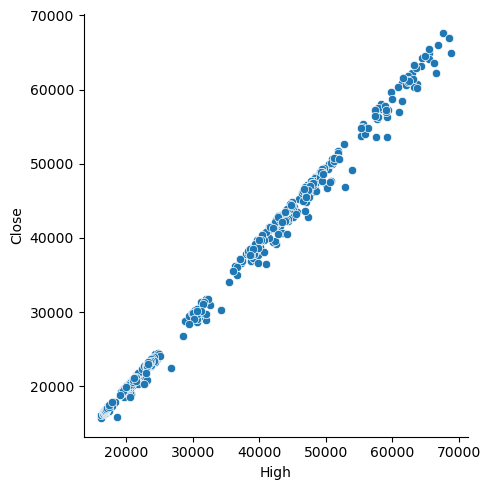

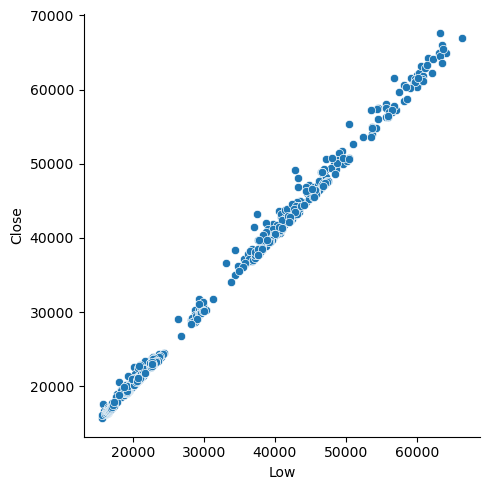

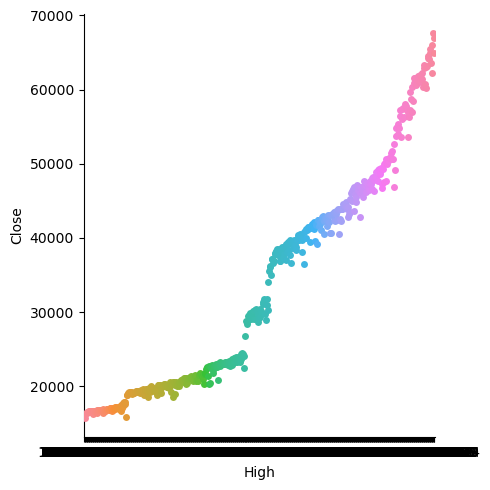

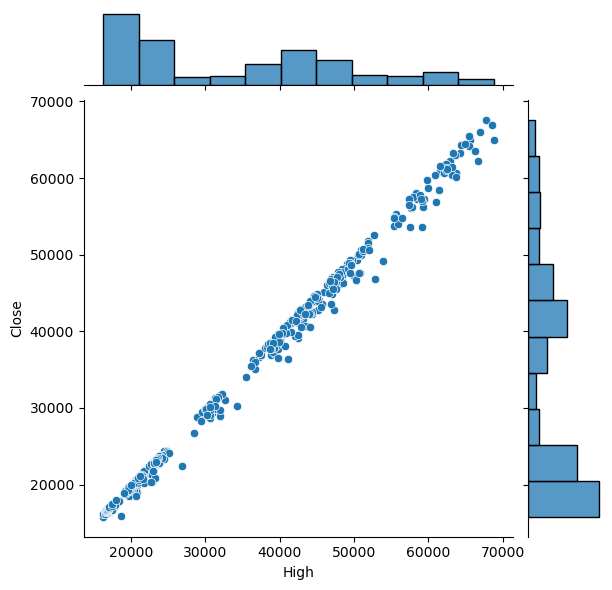

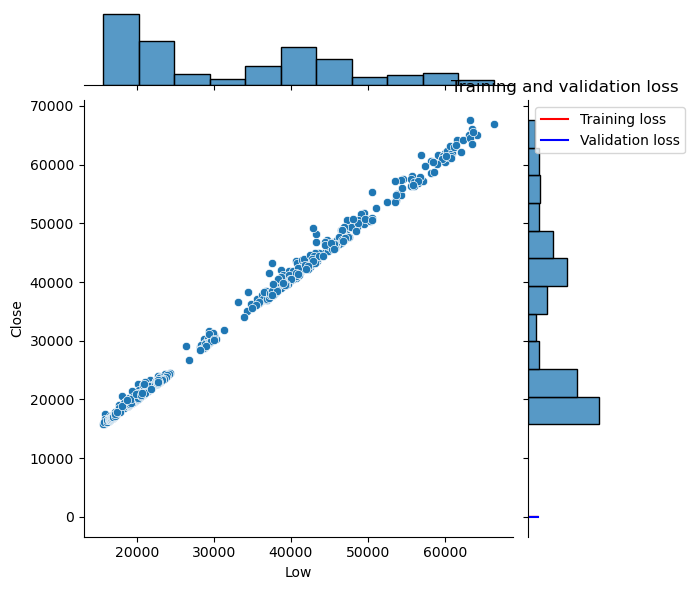

<Figure size 640x480 with 0 Axes>

In [140]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [141]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 13ms/step


((405, 1), (90, 1))

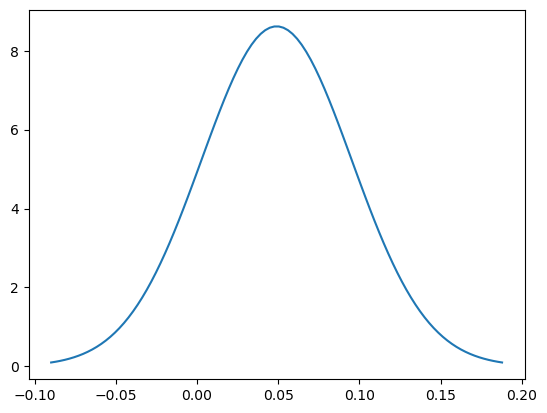

In [142]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have an LSTM model called 'model'
# and a test dataset called 'test_data'

# Make predictions on the test dataset
#test_predict = model.predict(test_data)

# Calculate the mean and standard deviation of the predicted values
mean = np.mean(test_predict)
std_dev = np.std(test_predict)

# Create a range of values for the x-axis
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)

# Calculate the y-axis values for the normal distribution
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)

# Plot the normal distribution
plt.plot(x, y)

# Show the plot
plt.show()

#Note that the bell curve is a graphical representation of the normal distribution, which is a continuous probability distribution. 
#The y-axis values of the curve represent the probability density of each value on the x-axis. 
#The total area under the curve is equal to 1, which represents the total probability of all possible outcomes.

In [143]:
import numpy as np

def calculate_z_score(test_predict):
    mean = np.mean(test_predict)
    std_dev = np.std([test_predict])
    z_scores = (test_predict - mean) / std_dev
    return z_scores

# Calculate the z-scores
z_scores = calculate_z_score(test_predict)
#print(z_scores)

#Note that the z-score is a measure of how many standard deviations a value is from the mean. 
# A z-score of 0 means the value is exactly at the mean, 
#while a z-score of 1 means the value is one standard deviation above the mean, and so on. 
# Negative z-scores indicate values below the mean.

In [144]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [145]:
"""Calculate Mean Absolute Percentage Error (MAPE)"""
def mape(original_ytrain,train_predict):
    
    original_ytrain,train_predict= np.array(original_ytrain), np.array(train_predict)
    return np.mean(np.abs((original_ytrain - train_predict) / original_ytrain)) * 100

mape_score = mape(original_ytrain,train_predict)
print("MAPE score:", mape_score)

MAPE score: 3.834055776887293


In [146]:
"""Calculate Mean Absolute Percentage Error (MAPE)"""
def mape(original_ytest,test_predict):
    
    original_ytest,test_predict= np.array(original_ytest), np.array(test_predict)
    return np.mean(np.abs((original_ytest - test_predict) / original_ytest)) * 100

mape_score = mape(original_ytest,test_predict)
print("MAPE score:", mape_score)

MAPE score: 2.737412157790863


**Accuracy score**

In [147]:
# Calculate the accuracy score 
mse = mean_squared_error(original_ytest,test_predict)
rmse = np.sqrt(mse)
accuracy = 1 - (rmse / np.mean(original_ytest))
print("Accuracy score:", accuracy*100)

Accuracy score: 95.57711270478933


In [148]:
# Calculate the accuracy score 
mse = mean_squared_error(original_ytrain,train_predict)
rmse = np.sqrt(mse)
accuracy = 1 - (rmse / np.mean(original_ytrain))
print("Accuracy score:", accuracy*100)

Accuracy score: 94.6923850196304


RMSE & MSE & MAE

In [149]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1954.7983522570185
Train data MSE:  3821236.597986754
Train data MAE:  1395.7964361836418
-------------------------------------------------------------------------------------
Test data RMSE:  820.8426736402723
Test data MSE:  673782.6948689106
Test data MAE:  528.0188474444444


VARIANCE REGRESSION SCORE

In [150]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9801203465345286
Test data explained variance regression score: 0.913268938206337


r2_score

In [151]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9801177372530522
Test data R2 score: 0.9054743610486153


In [152]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0027319345954720845
Test data MGD:  0.0018489063323202783
----------------------------------------------------------------------
Train data MPD:  96.62966910533414
Test data MPD:  35.15489925707289


In [153]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Bitcoin price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (527, 1)
Test predicted data:  (527, 1)


In [154]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output=[]
n_steps=time_step
i=0
pred_days = 15        #next prediction days
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  15


In [155]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]


In [156]:
from ipywidgets.widgets.interaction import interactive
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 15 days close price'])  ##

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Bitcoin price','index': 'Date'})


fig.update_layout(title_text='Compare last 15 days vs next 15 days',  
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')   ###

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [157]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]
names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Bitcoin price','index':'Timestamp'})

fig.update_layout(title_text='Plotting whole closing Bitcoin price with prediction',
                   font_size=15, font_color='black',legend_title_text='Bitcoin')
#plot_bgcolor='white'
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [158]:
#fig.write_html('bitcoin.html')

In [159]:
# Creating PKL File
#import joblib
#joblib.dump(model,'bitcoin.pkl')